In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:
!pip install roboflow  # Install the roboflow module

In [ ]:
from roboflow import Roboflow

1. https://roboflow.com/ 회원가입 <br>
2. workspace 생성 <br>
3. project 생성 <br>
4. api_key copy

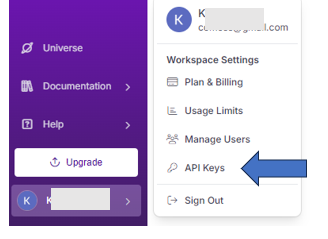

In [ ]:
rf = Roboflow(api_key="your_key")
project = rf.workspace("kdtai3").project("kdt_ai3")



loading Roboflow workspace...
loading Roboflow project...


5. dataset(image) upload and processing

In [ ]:
dataset = project.version(2).download("yolov5")

In [ ]:
import requests

api_key = "your_key"
response = requests.get(f"https://api.roboflow.com/?api_key={api_key}")
print(response.json())


{'welcome': 'Welcome to the Roboflow API.', 'instructions': 'You are successfully authenticated.', 'docs': 'https://docs.roboflow.com', 'workspace': 'kdtai3'}


In [ ]:
import requests

api_key = "your_key"
workspace = "kdtai3"

response = requests.get(f"https://api.roboflow.com/{workspace}?api_key={api_key}")
data = response.json()

# Check the structure of the response
print(data.keys())

# Access project information based on the actual response structure
# For example, if project information is under 'workspace' key:
if 'workspace' in data:
    for project in data['workspace']['projects']:
        print(project['name'])

dict_keys(['workspace'])
KDT_AI3


In [1]:
import requests

api_key = "your_key"
workspace = "kdtai3"
project_name = "kdt_ai3"

response = requests.get(f"https://api.roboflow.com/{workspace}/{project_name}?api_key={api_key}")
project_info = response.json()

# 프로젝트 버전 정보 출력
for version in project_info['versions']:
    print(f"Version {version['version']}: {version['createdAt']}, {version['id']}")


In [ ]:
from pathlib import Path

In [ ]:
rel_path = "/content/KDT-2/data.yaml"

In [ ]:
full_path = Path(rel_path).resolve()

In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
model.train(data=full_path, epochs=20, imgsz=640, plots=True)

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/KDT-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 15.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/KDT-2/train/labels... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<00:00, 590.34it/s]

train: New cache created: /content/KDT-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/KDT-2/valid/labels... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 702.43it/s]

val: New cache created: /content/KDT-2/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.548      2.726      1.907          9        640: 100%|██████████| 2/2 [00:26<00:00, 13.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

                   all          6          7    0.00389          1      0.701      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.476      2.708       1.65         14        640: 100%|██████████| 2/2 [00:21<00:00, 10.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all          6          7    0.00389          1      0.771      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.395      2.703      1.785         11        640: 100%|██████████| 2/2 [00:18<00:00,  9.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          6          7    0.00389          1      0.902      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.162      2.292      1.502         15        640: 100%|██████████| 2/2 [00:18<00:00,  9.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all          6          7    0.00389          1      0.943      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.225      2.043      1.535         20        640: 100%|██████████| 2/2 [00:18<00:00,  9.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          6          7    0.00389          1      0.978      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.312      1.795      1.614         12        640: 100%|██████████| 2/2 [00:18<00:00,  9.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          6          7    0.00389          1      0.995      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.319      1.518      1.509         18        640: 100%|██████████| 2/2 [00:19<00:00,  9.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          6          7    0.00389          1      0.995      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.9861      1.377      1.373         14        640: 100%|██████████| 2/2 [00:18<00:00,  9.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          6          7      0.923          1      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.205       1.44      1.451         10        640: 100%|██████████| 2/2 [00:19<00:00,  9.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all          6          7       0.87      0.958      0.978      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G       1.06      1.304      1.335         17        640: 100%|██████████| 2/2 [00:18<00:00,  9.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          6          7      0.927      0.857      0.978      0.533


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.043      2.359      1.492          5        640: 100%|██████████| 2/2 [00:19<00:00,  9.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all          6          7      0.856          1      0.978      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.106      2.369      1.604          5        640: 100%|██████████| 2/2 [00:18<00:00,  9.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          6          7     0.0194          1      0.978      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.8977      1.895      1.447          6        640: 100%|██████████| 2/2 [00:18<00:00,  9.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

                   all          6          7    0.00389          1      0.995      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.141      1.875      1.492          6        640: 100%|██████████| 2/2 [00:18<00:00,  9.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          6          7    0.00389          1      0.995      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G       0.93      1.936      1.287          5        640: 100%|██████████| 2/2 [00:18<00:00,  9.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          6          7    0.00389          1      0.995      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.7982      1.873      1.381          5        640: 100%|██████████| 2/2 [00:22<00:00, 11.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          6          7    0.00389          1      0.995      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      0.886      1.758      1.313          6        640: 100%|██████████| 2/2 [00:18<00:00,  9.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          6          7    0.00646          1      0.995      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.9636      1.849      1.427          5        640: 100%|██████████| 2/2 [00:19<00:00,  9.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all          6          7      0.722          1      0.995      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      0.963      1.729      1.386          6        640: 100%|██████████| 2/2 [00:18<00:00,  9.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          6          7      0.857          1      0.995      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.7701      1.639      1.268          5        640: 100%|██████████| 2/2 [00:18<00:00,  9.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all          6          7          1      0.585      0.995      0.599



20 epochs completed in 0.122 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


                   all          6          7      0.922          1      0.995      0.636
Speed: 1.9ms preprocess, 178.6ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7879c7641090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train22/weights/best.pt conf=0.1 source=Ferret_test-2/test/images save=True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 807, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 142, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 294, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 855, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 781, in torch_safe_load
    ckpt = torch.load(fi

In [ ]:
model = YOLO('/content/runs/detect/train3/weights/best.pt')  # load a custom model

In [ ]:
# Predict with the model
results = model.predict('/content/ferret7.jpg', conf=0.1)  # predict on an image


image 1/1 /content/ferret7.jpg: 448x640 (no detections), 203.0ms
Speed: 4.4ms preprocess, 203.0ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cars'}
 obb: None
 orig_img: array([[[127, 149, 167],
         [127, 149, 167],
         [127, 149, 167],
         ...,
         [118, 146, 163],
         [118, 146, 163],
         [118, 146, 163]],
 
        [[127, 149, 167],
         [127, 149, 167],
         [127, 149, 167],
         ...,
         [118, 146, 163],
         [118, 146, 163],
         [118, 146, 163]],
 
        [[127, 149, 167],
         [127, 149, 167],
         [127, 149, 167],
         ...,
         [118, 146, 163],
         [118, 146, 163],
         [118, 146, 163]],
 
        ...,
 
        [[142, 151, 164],
         [133, 142, 155],
         [118, 127, 140],
         ...,
         [117, 133, 145],
         [151, 167, 179],
         [148, 164, 176]],
 
        [[140, 149, 162],
         [129, 138, 151],
         [111, 120, 133],
         ...,
         [ 99, 115, 

In [ ]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs

In [ ]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (584, 876)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))

In [ ]:
from PIL import Image

In [ ]:
# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results.jpg')  # save image